### Geoff the Code Guru!

### Big Picture:  We want to create visualizations that allow us to see patterns in the relationships between the most important predictors of 
- Funds that Drop (funds that close), 
- Funds that Switch Auditors / Administrators, 
- and Funds that are Loyal to Auditors / Administrators.  

### Modeling and early EDA point to *Assets of the Fund* and *Change in Assets of the Fund* as very important predictors.  From the visualizations, we will be able to tell stories about what is happening.  We will also fine-tune the parameters for the models based on the visualizations.  

###  Please read through this entire notebook first.  Jot down questions while I meet with others on the team.  Start sketching out pseudo code.  Let's then discuss your questions, brainstorm briefly and be off to the races!

#### Write an initial function that:
1. Sets five parameters (the initial use case should take in df=geoff, n=10, x=UniqueGAV_16, y=UniqueGAV_14_16_pct_change, z=Drop_Fund_17).  UniqueGAV_16 is just a wierdly named variable that refers to the Assets of the Fund as of 3/31/2016.  UniqueGAV_14_16_pct_change refers to the percent change in Assets of the fund from 3/31/2014 to 3/31/2016.  
2. Returns two DataFrames, each with n columns and n rows, initially n=10.
3. Each column contains 1/n-th of the values for x, ranked descending. So, column 1 would have the 10% of values with the lowest UniqueGAV_16, column 2 would have the 10% to 20% of values of UniqueGAV_16 etc. with column 10 having the top 10% of values of UniqueGAV_16. The df geoff has 25084 rows, so 2508 values would go into each column.  The "extra 4" rows (25084-25080) can be split in any way into the 10 columns.  Columns can be named: 10%, 20%, 30% etc up to 100%.
4. Each row contains 1/n-th of the values for y, ranked descending. So, row 1 would have the 10% of values with the lowest UniqueGAV_14_16_pct_change, row 2 would have the 10% to 20% of values of UniqueGAV_14_16_pct_change etc with row 10 having the top 10% of values of UniqueGAV_14_16_pct_change.  Again, the df geoff has 25084 rows, so 2508 values would go into each row.  The "extra 4" rows (25084-25080) can be split in any way into the 10 rows. Rows can be named: 10%, 20%, 30% etc up to 100%.
5. The first dataframe would have the counts of funds from the df=geoff in each cell.  So, the first cell with bottom 10% UniqueGAV_16 and bottom 10% UniqueGAV_14_16_pct_change might have 250 funds or might have 200 or might have 300.  
6. The second dataframe would have the %z in each cell.  So, in this case, let's assume there are 300 funds in the bottom 10% / bottom 10% cell.  Of these 300 funds, what percent are z = Drop_Fund_17 == 1?  Let's say 75 of the 300...then 25%.  Round all values to two decimals if it can be done quickly.  If not, that's ok. Would just look nicer for heatmap below. 
7. Save each dataframe to a csv.  Use the naming convention for the csv of x + "_" + y + "_ + z + "_count" and  x + "_" + y + "_ + z + "_percent".  I know the names will be really long!
8. Create two more dataframes as outputs. The first will have the columns 10%, 20%....100% as above. The first row of data will have the lowest value in the column.  The second row of data will have the highest value in the column.  So, the column with 10% will likely have row 1 = 1 dollar and row 2 = about 100000 dollars (just a wild guess).  The column with 100% might have a low value in row 1 of several hundred million or a billion dollars and a high value in row 2 of 232 billion or so.
9. The final dataframe will have rows labeled 10%, 20% ....100%. Column 1 will have the lowest value for that row and column 2 will have the highest value for that row.  So, 10% will be low of -99.9% (-0.999) and high of maybe -80% (just a guess).  For 100%, the values of % increase will be approaching infinity!
10. Save these two dataframes to csv using same naming convention as above plus "_row_ranges" and "_column_ranges" in place of "-count" and "_percent".
11. As part of the same function or possibly a new function, create a heatmap from each dataframe.  Some partial code is below.  Save each heatmap as a png image.

In [1]:
# Import libraries
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
geoff = pd.read_csv("./geoff.csv")

In [58]:
n = 10

In [71]:
geoff['UniqueGAV_16_n'] = pd.qcut(geoff['UniqueGAV_16'].sort_values(),n,labels=False)
geoff['UniqueGAV_14_16_pct_change_n'] = pd.qcut(geoff['UniqueGAV_14_16_pct_change'].sort_values(),n,labels=False)
heat_count = geoff.groupby(['UniqueGAV_16_n','UniqueGAV_14_16_pct_change_n'])['UniqueGAV_16'].count().unstack()
heat_drop = geoff.groupby(['UniqueGAV_16_n','UniqueGAV_14_16_pct_change_n'])['Drop_Fund_17'].mean().unstack()

# Spot check values

In [72]:
geoff.groupby('UniqueGAV_14_16_pct_change_n')['UniqueGAV_14_16_pct_change'].max()

UniqueGAV_14_16_pct_change_n
0   -7.344576e-01
1   -5.138681e-01
2   -3.537676e-01
3   -2.143901e-01
4   -8.746619e-02
5    0.000000e+00
6    1.036493e-01
7    3.322301e-01
8    1.021310e+00
9    4.371760e+08
Name: UniqueGAV_14_16_pct_change, dtype: float64

# Count of Funds

In [73]:
geoff.groupby(['UniqueGAV_16_n','UniqueGAV_14_16_pct_change_n'])['UniqueGAV_16'].count().unstack()

UniqueGAV_14_16_pct_change_n,0,1,2,3,4,5,6,7,8,9
UniqueGAV_16_n,,,,,,,,,,
0,1003,322,192,147,144,370,71,98,83,79
1,515,367,272,258,229,305,123,147,160,132
2,315,328,305,268,237,335,162,212,175,171
3,221,301,332,268,263,304,162,251,223,184
4,143,283,287,307,272,328,207,256,230,195
5,122,249,277,293,240,303,221,272,262,269
6,91,228,256,247,290,275,249,281,303,289
7,46,197,248,272,283,274,250,296,332,310
8,35,141,204,232,305,321,267,324,319,360


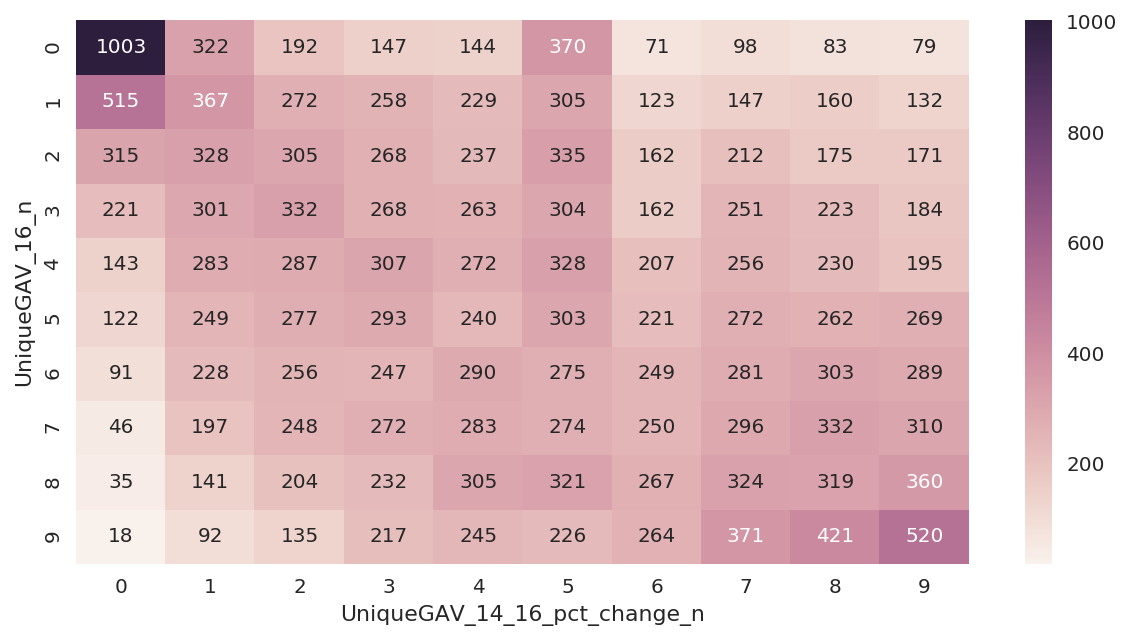

In [114]:
plt.figure(figsize=(10,5))
sns.heatmap(heat_count,annot=True,fmt='g')

# Funds that Drop

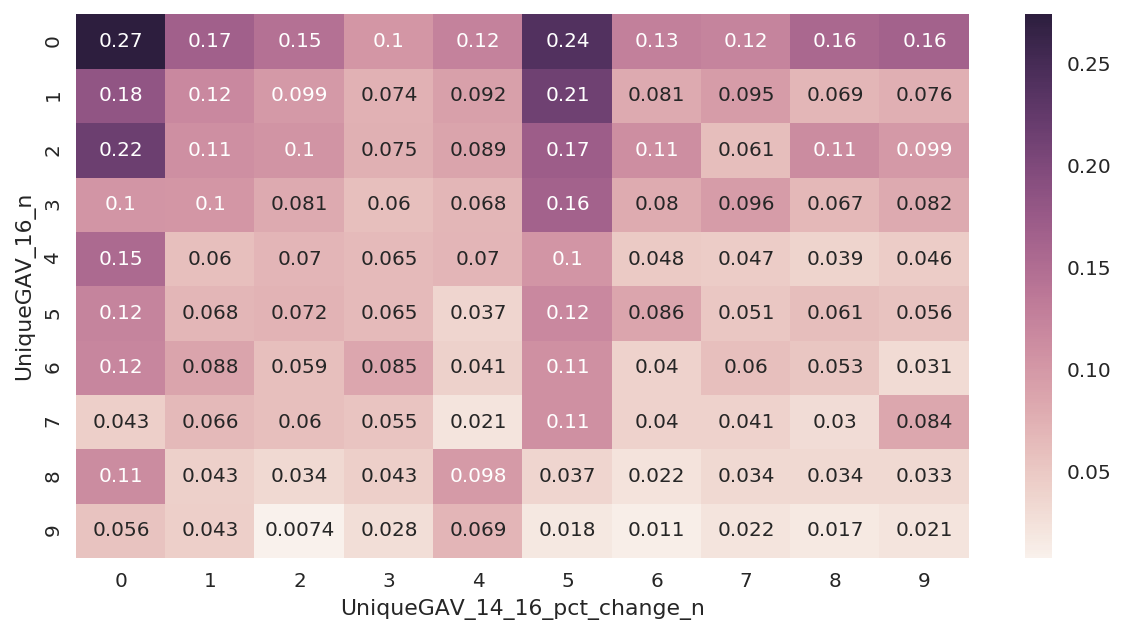

In [115]:
plt.figure(figsize=(10,5))
sns.heatmap(heat_drop,annot=True)

# Funds that change

In [131]:
geoff.head()

,Unnamed: 0,UniqueGAV_16,UniqueGAV_14_16_pct_change,UniqueGAV_15_16_pct_change,Type_16,Drop_Fund_17,Same_Fund_17_Same_AuditGrp,Same_Fund_17_Same_AdminGrp,Same_Fund_17_New_AuditGrp,Same_Fund_17_New_AdminGrp,UniqueGAV_16_n,UniqueGAV_14_16_pct_change_n
0,0,36300000.0,0.123839,0.134375,PE,0.0,1.0,1.0,0.0,0.0,4,7
1,1,219800000.0,0.176660,0.137093,PE,0.0,1.0,1.0,0.0,0.0,7,7
2,2,28200000.0,-0.269430,-0.233696,PE,0.0,1.0,1.0,0.0,0.0,4,3
3,3,103800000.0,-0.470678,-0.219549,PE,0.0,1.0,1.0,0.0,0.0,6,2
4,4,80300000.0,-0.418537,-0.196196,PE,0.0,1.0,1.0,0.0,0.0,5,2


In [132]:
heat_same_audit = geoff.groupby(['UniqueGAV_16_n','UniqueGAV_14_16_pct_change_n'])['Same_Fund_17_Same_AuditGrp'].mean().unstack()
heat_same_audit = geoff.groupby(['UniqueGAV_16_n','UniqueGAV_14_16_pct_change_n'])['Same_Fund_17_Same_AdminGrp'].mean().unstack()
heat_same_audit = geoff.groupby(['UniqueGAV_16_n','UniqueGAV_14_16_pct_change_n'])['Same_Fund_17_New_AuditGrp'].mean().unstack()
heat_same_audit = geoff.groupby(['UniqueGAV_16_n','UniqueGAV_14_16_pct_change_n'])['Same_Fund_17_New_AdminGrp'].mean().unstack()

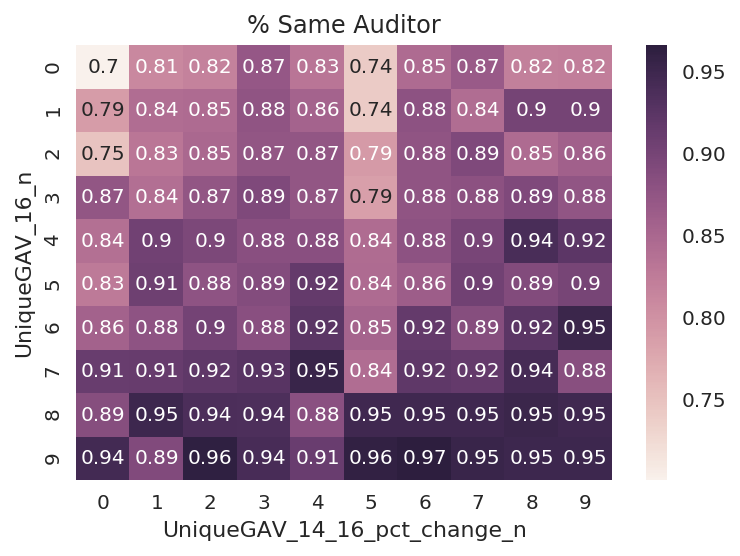

In [130]:
ax = plt.axes()
#plt.figure(figsize=(10,5))
#sns.heatmap(heat_same_audit, ax = ax)
sns.heatmap(heat_same_audit,annot=True,ax=ax)

ax.set_title('% Same Auditor')
plt.show()

# plt.title = 'Hi'
# plt.figure(figsize=(10,5))


# try to get counts by type

In [123]:
geoff.groupby(['UniqueGAV_16_n','UniqueGAV_14_16_pct_change_n','Type_16']).size().unstack()

Type_16                                         HF   LF  OTHER  OTHER-AI  \
UniqueGAV_16_n UniqueGAV_14_16_pct_change_n                                
0              0                             185.0  NaN    NaN       NaN   
               1                              54.0  NaN    NaN       NaN   
               2                              28.0  1.0    NaN       NaN   
               3                              26.0  NaN    NaN       NaN   
               4                              16.0  NaN    NaN       NaN   
               5                              34.0  2.0    NaN       NaN   
               6                               5.0  NaN    NaN       NaN   
               7                              13.0  NaN    NaN       NaN   
               8                              15.0  NaN    NaN       NaN   
               9                               7.0  NaN    NaN       NaN   
1              0                             141.0  1.0    2.0       NaN   
               1                              73.0  1.0    NaN       NaN   
               2                              62.0  NaN    NaN       NaN   
               3                              38.0  1.0    1.0       NaN   
               4                              39.0  NaN    NaN       NaN   
               5                              47.0  NaN    NaN       NaN   
               6                              17.0  NaN    NaN       NaN   
               7                              22.0  NaN    NaN       NaN   
               8                              36.0  1.0    NaN       NaN   
               9                              20.0  NaN    NaN       NaN   
2              0                             101.0  1.0    NaN       NaN   
               1                              89.0  NaN    NaN       NaN   
               2                              59.0  NaN    NaN       NaN   
               3                              53.0  NaN    NaN       NaN   
               4                              51.0  NaN    NaN       NaN   
               5                              75.0  NaN    NaN       NaN   
               6                              40.0  1.0    3.0       NaN   
               7                              40.0  NaN    1.0       NaN   
               8                              37.0  NaN    NaN       NaN   
               9                              32.0  NaN    NaN       NaN   
...                                            ...  ...    ...       ...   
7              0                              18.0  1.0    NaN       NaN   
               1                              50.0  NaN    NaN       NaN   
               2                              58.0  NaN    1.0       NaN   
               3                              75.0  NaN    NaN       NaN   
               4                              82.0  2.0    NaN       NaN   
               5                              85.0  2.0    NaN       NaN   
               6                              95.0  NaN    1.0       NaN   
               7                              97.0  NaN    NaN       NaN   
               8                             127.0  NaN    1.0       NaN   
               9                             119.0  NaN    5.0       NaN   
8              0                              14.0  1.0    NaN       NaN   
               1                              48.0  NaN    NaN       NaN   
               2                              61.0  NaN    2.0       NaN   
               3                              67.0  NaN    2.0       NaN   
               4                              97.0  NaN    1.0       NaN   
               5                              81.0  1.0    NaN       NaN   
               6                              89.0  NaN    NaN       NaN   
               7                             127.0  NaN    NaN       NaN   
               8                             133.0  1.0    NaN       NaN   
               9                             155

In [77]:
# Incorporate code below to create a heatmap for each df
# Save each heatmap as an image
# We will need to discuss details on this
# Would be great to add titles / legends if you know how to do quickly
# Otherwise, I can work later to add titles / legends
with sns.axes_style("white"):
    ax = sns.heatmap(df, square=True, annot=True, linewidths=0.5)


NameError: name 'df' is not defined

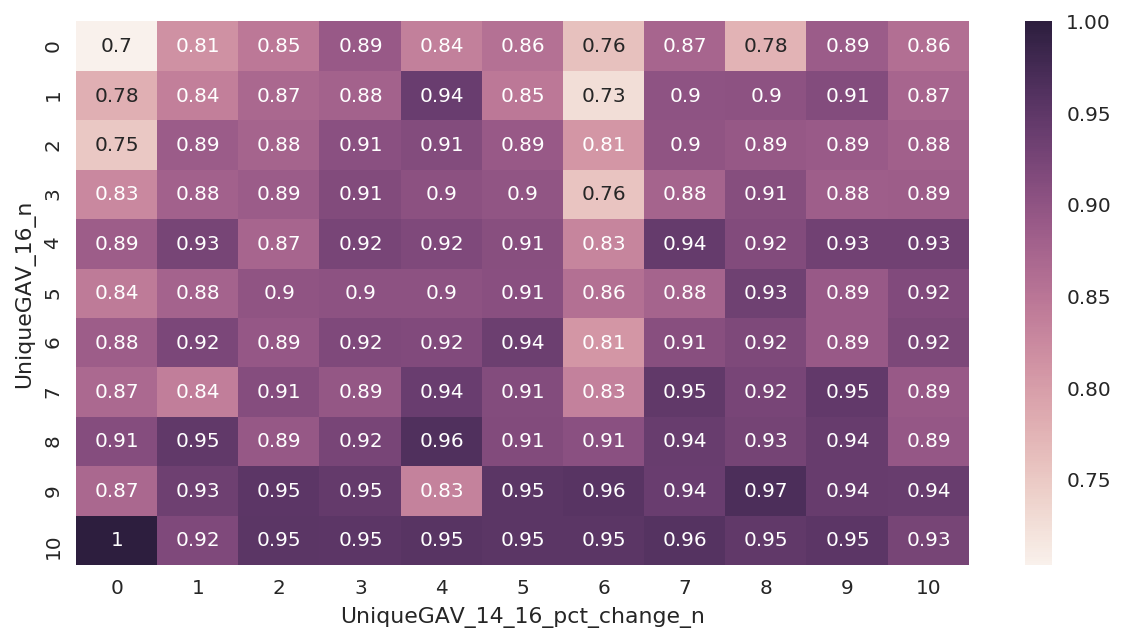

In [140]:
heatup(geoff,n=11,x='UniqueGAV_16',y='UniqueGAV_14_16_pct_change',z='Same_Fund_17_Same_AdminGrp')

In [147]:
fund = 'HF'

df = geoff[geoff['Type_16'] == fund]

In [159]:
def heatup(df,n=10,x='UniqueGAV_16',y='UniqueGAV_14_16_pct_change',z='Drop_Fund_17',fund=False):
    import seaborn as sns
    if fund:
        fund_df = df[df['Type_16'] == fund].copy()
        x_decile = x+'_n'
        y_decile = y+'_n'
        fund_df[x_decile] = pd.qcut(fund_df[x].sort_values(),n,labels=False)
        fund_df[y_decile] = pd.qcut(fund_df[y].sort_values(),n,labels=False)
        fig = plt.figure(figsize=(10,5))
        ax = fig.add_subplot(1, 1, 1)
        ax.set_title(fund+': '+z)
        sns.heatmap(fund_df.groupby([x_decile,y_decile])[z].mean().unstack(),annot=True,ax=ax)        
    else:
        x_decile = x+'_n'
        y_decile = y+'_n'
        df[x_decile] = pd.qcut(df[x].sort_values(),n,labels=False)
        df[y_decile] = pd.qcut(df[y].sort_values(),n,labels=False)
        fig = plt.figure(figsize=(10,5))
        ax = fig.add_subplot(1, 1, 1)
        ax.set_title(z)
        sns.heatmap(df.groupby([x_decile,y_decile])[z].mean().unstack(),annot=True,ax=ax)

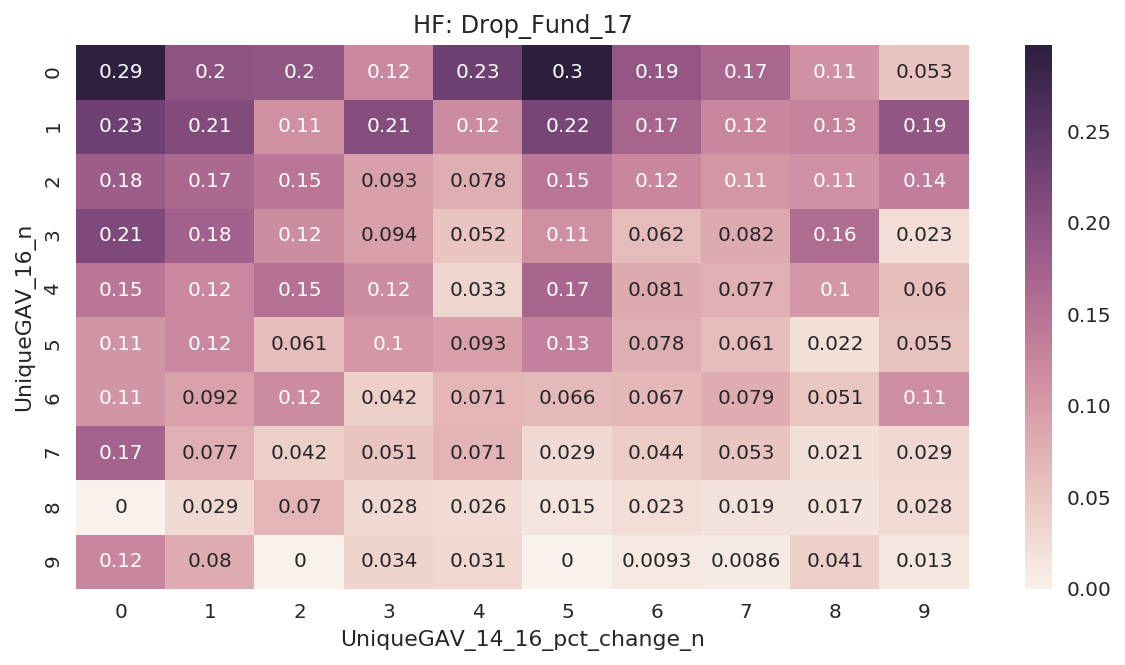

In [157]:
heatup(geoff,fund='HF')

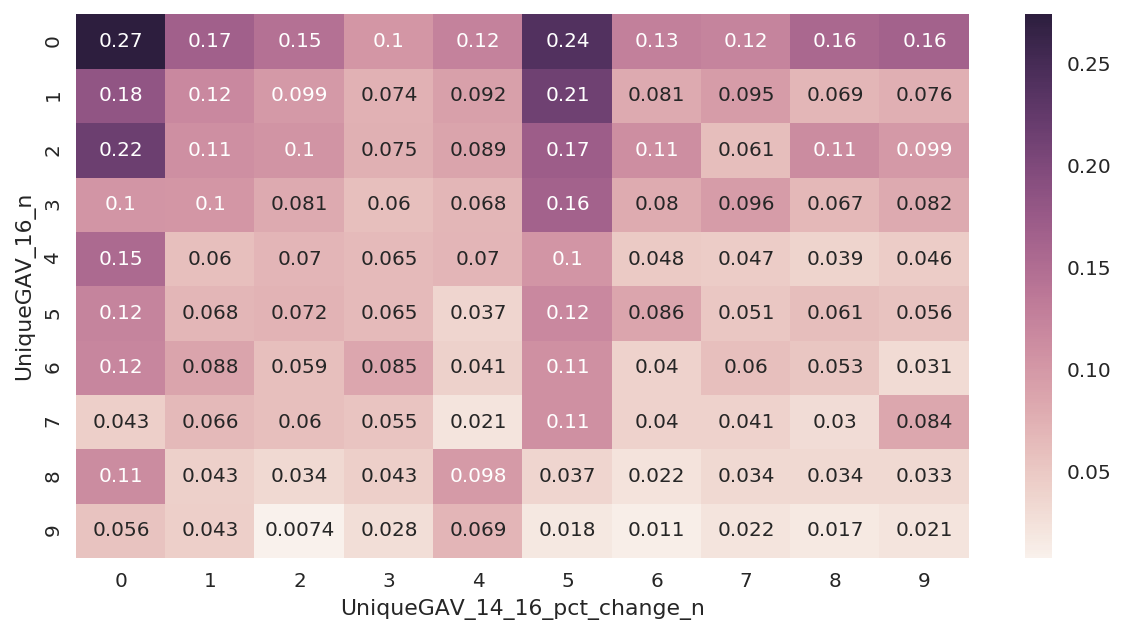

In [152]:
heatup(geoff)

#### Write a second function that:
1. Does everything as above PLUS....
2. Sets a sixth parameter initally set to Type = "HF"
3. Subsets the input dataframe geoff based on the column named Type_16.  This would be the Type for the sixth parameter and initially would be set equal to "HF" which is the code for Hedge Fund.

#### Write a third function that:
1. Does everything the same as function 2, but sets the buckets for n based on the total df = geoff, not the subset df = geoff with Type_16 == "HF".  The idea here is to compare how the product types fit into the overall decile bucketing from all funds as opposed to the newly created decile bucketing for the particular fund type in the second function above.

In [ ]:
# input code for function 2 here

In [ ]:
# input code for function 3 here

#### Call the first function on the following combinations:
1. df=geoff, n=10, x=UniqueGAV_16, y=UniqueGAV_14_16_pct_change, z=Drop_Fund_17.  This was the base case for creating the function.
2. df=geoff, n=10, x=UniqueGAV_16, y=UniqueGAV_15_16_pct_change, z=Drop_Fund_17 (this is almost identical to first call except switch 14 to 15 in y). Is the story different based on one vs two years change in assets?
3. df=geoff, n=10, x=UniqueGAV_14_16_pct_change, y=UniqueGAV_15_16_pct_change, z=Drop_Fund_17.  How related are the two change in asset variables versus Drop_Fund_17?
4. df=geoff, n=10, x=UniqueGAV_16, y=UniqueGAV_14_16_pct_change, z=Same_Fund_17_Same_AuditGrp. This is for funds that are loyal to the same Auditor.  How are the patterns different here?
5. df=geoff, n=10, x=UniqueGAV_16, y=UniqueGAV_14_16_pct_change, z=Same_Fund_17_New_AuditGrp. This is for funds that switch Auditors.  How are the patterns different here?
6. df=geoff, n=10, x=UniqueGAV_16, y=UniqueGAV_14_16_pct_change, z=Same_Fund_17_Same_AdminGrp. This is for funds that are loyal to the same Administrator.  How are the patterns different here?
7. df=geoff, n=10, x=UniqueGAV_16, y=UniqueGAV_14_16_pct_change, z=Same_Fund_17_New_AdminGrp. This is for funds that switch Administrators.  How are the patterns different here?

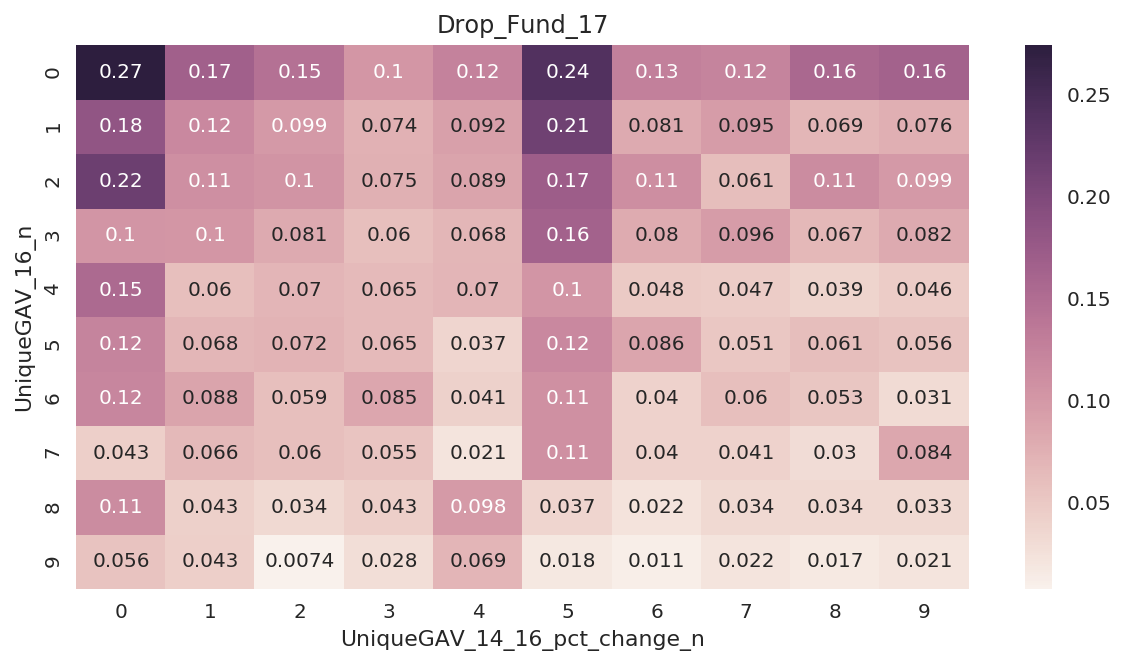

In [161]:
heatup(df=geoff, n=10, x='UniqueGAV_16', y='UniqueGAV_14_16_pct_change', z='Drop_Fund_17')

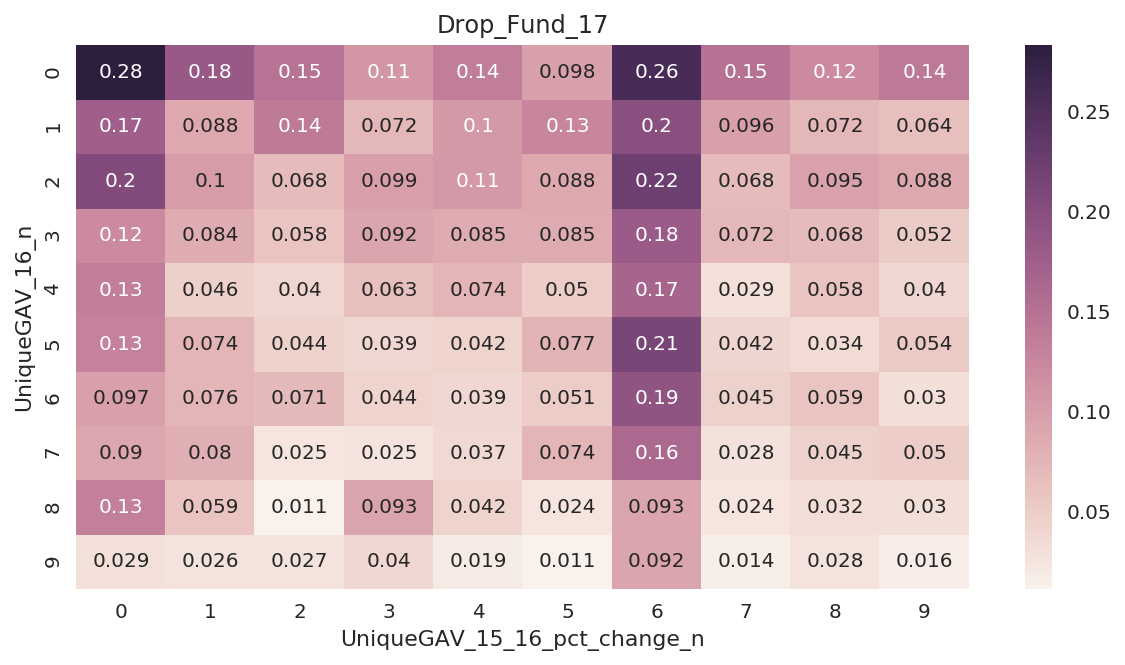

In [162]:
heatup(df=geoff, n=10, x='UniqueGAV_16', y='UniqueGAV_15_16_pct_change', z='Drop_Fund_17')

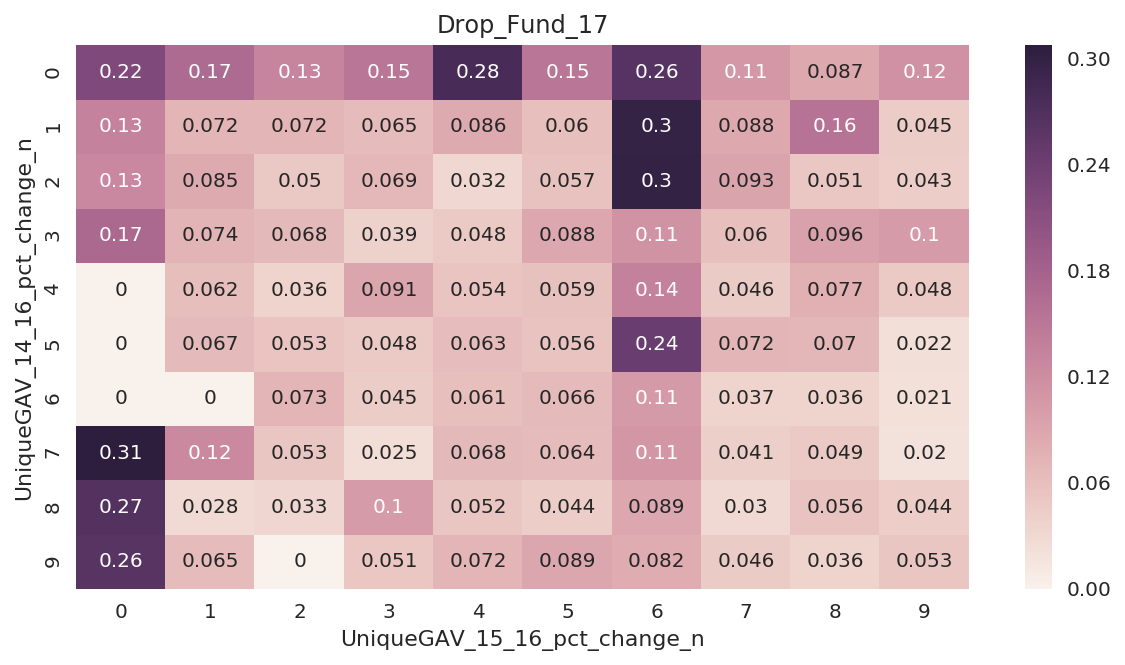

In [163]:
heatup(df=geoff, n=10, x='UniqueGAV_14_16_pct_change', y='UniqueGAV_15_16_pct_change', z='Drop_Fund_17')

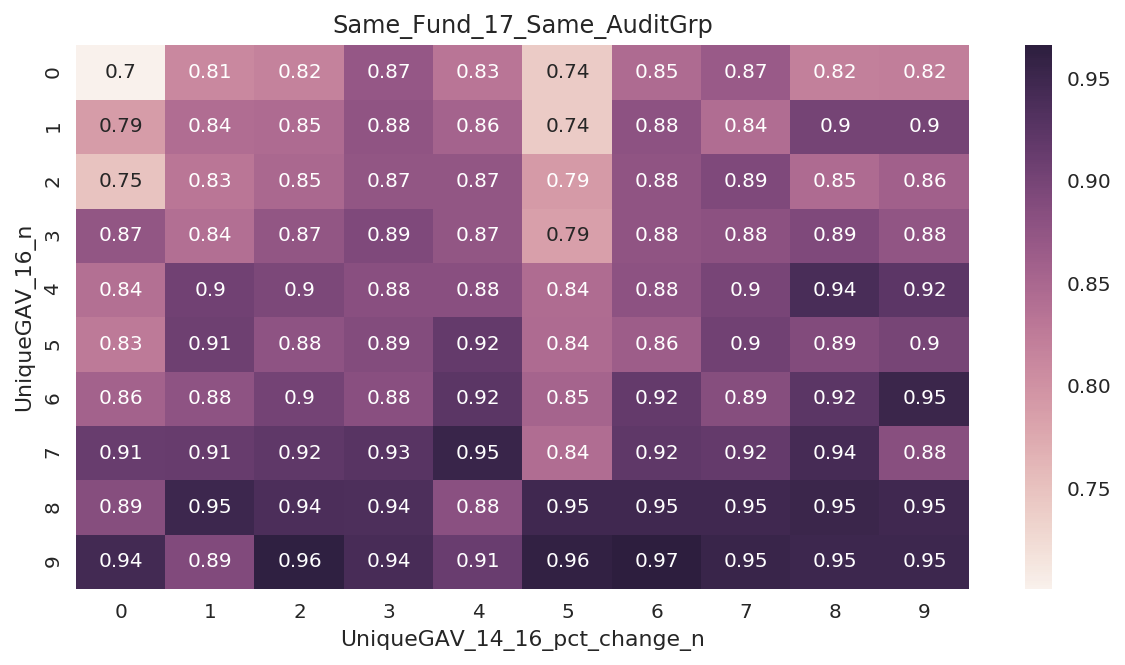

In [164]:
heatup(df=geoff, n=10, x='UniqueGAV_16', y='UniqueGAV_14_16_pct_change', z='Same_Fund_17_Same_AuditGrp')

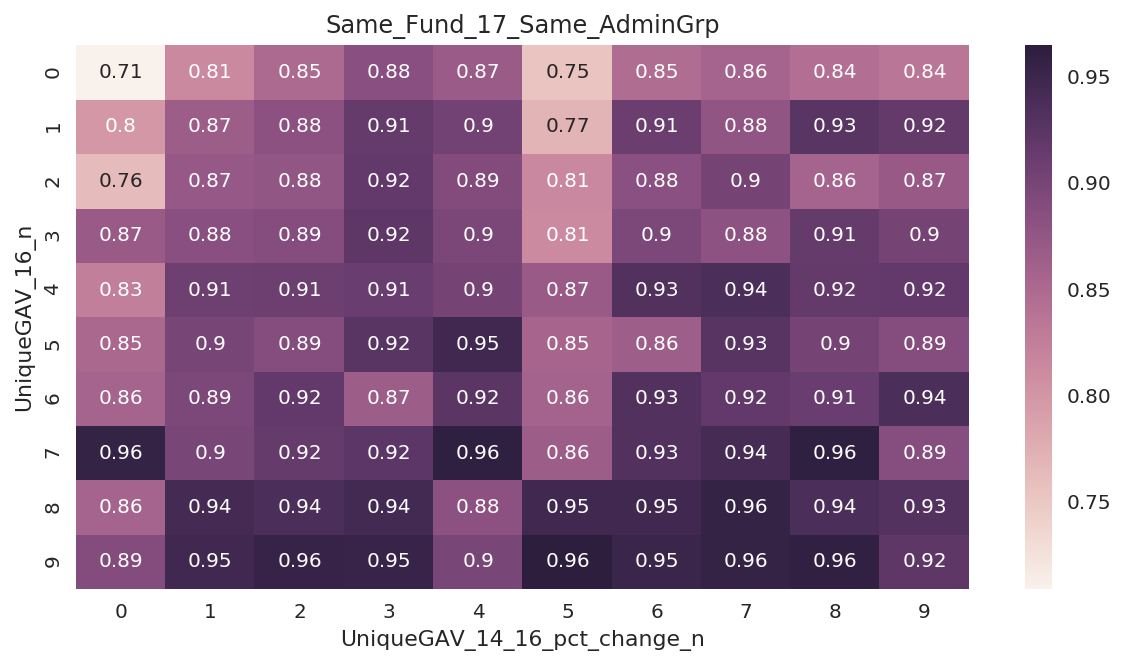

In [166]:
heatup(df=geoff, n=10, x='UniqueGAV_16', y='UniqueGAV_14_16_pct_change', z='Same_Fund_17_Same_AdminGrp')

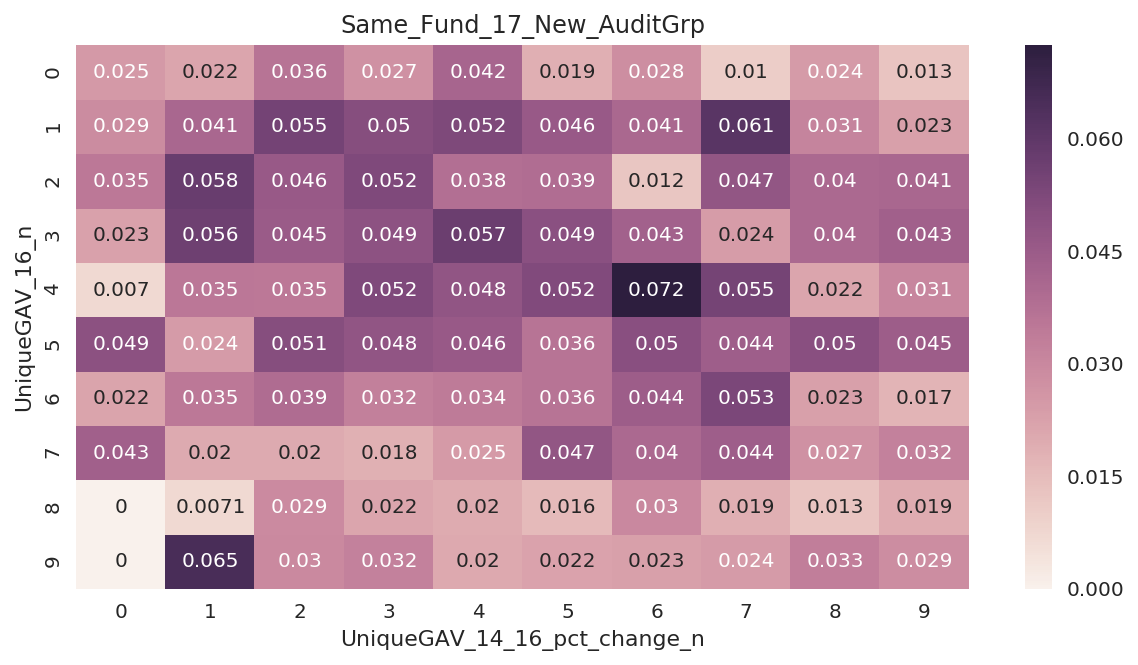

In [165]:
heatup(df=geoff, n=10, x='UniqueGAV_16', y='UniqueGAV_14_16_pct_change', z='Same_Fund_17_New_AuditGrp')

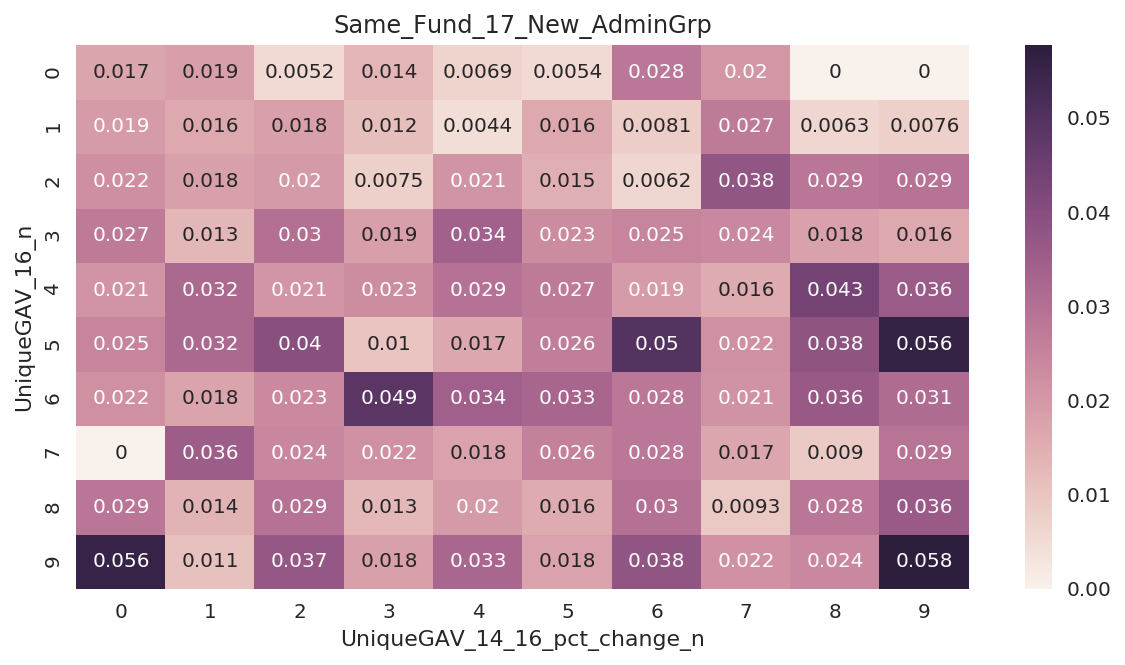

In [167]:
heatup(df=geoff, n=10, x='UniqueGAV_16', y='UniqueGAV_14_16_pct_change', z='Same_Fund_17_New_AdminGrp')

In [ ]:
# insert function with respective calls
# study outputs and draw high level conclusions
# spend most time looking at Drop_Fund_17 and Same_Fund_17_New_AuditGrp

#### Call the second and third functions on the following combinations:
1. The same 7 as for the first function for each of HF, VC, PE, RE, SAF
2. It's probably possible to write a function that loops through each of the Type_16 categories?


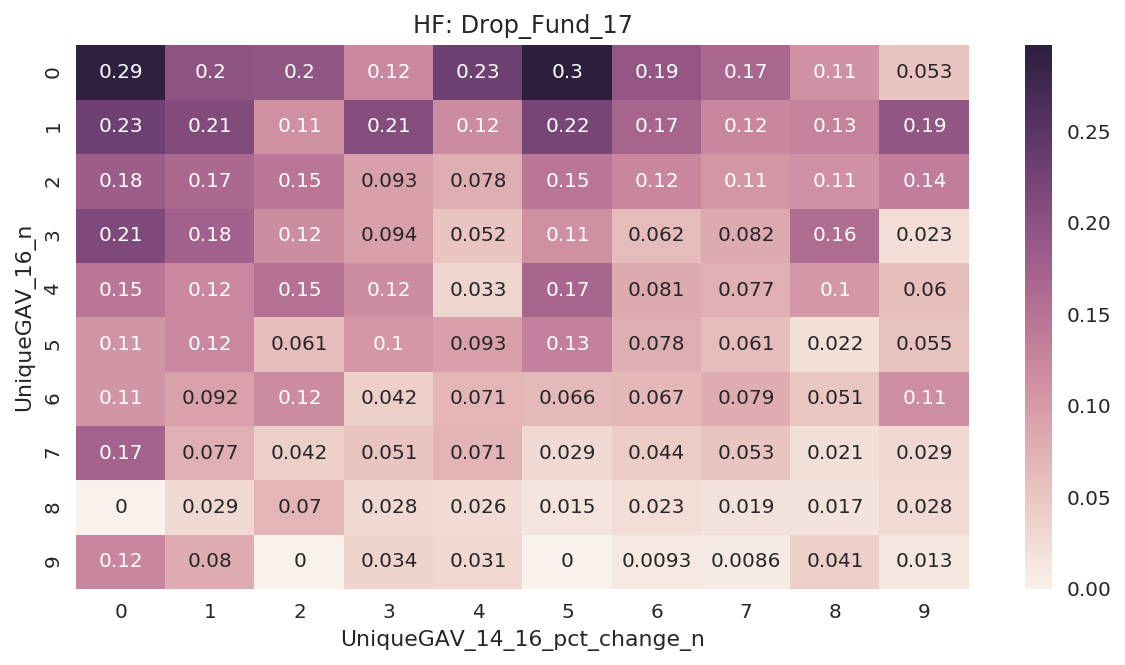

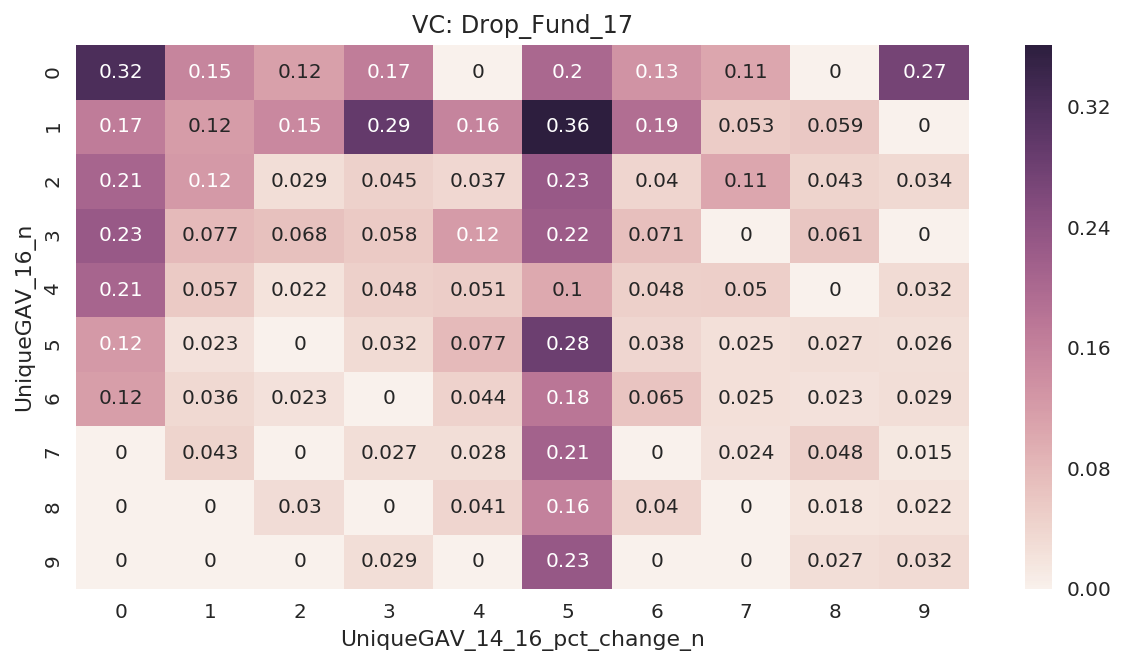

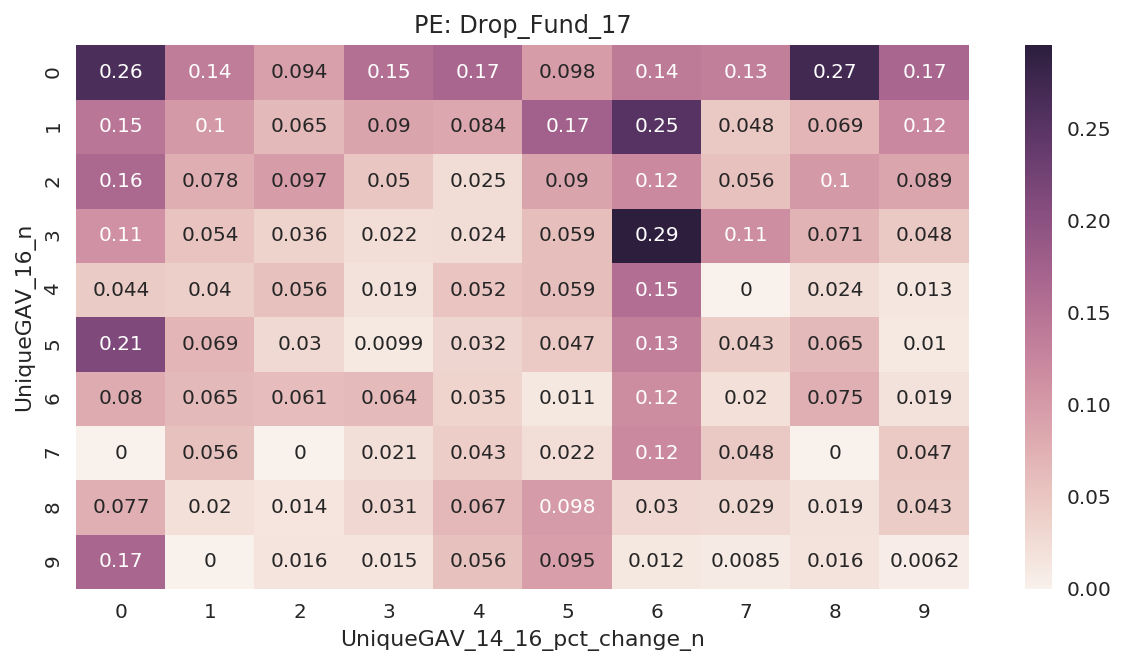

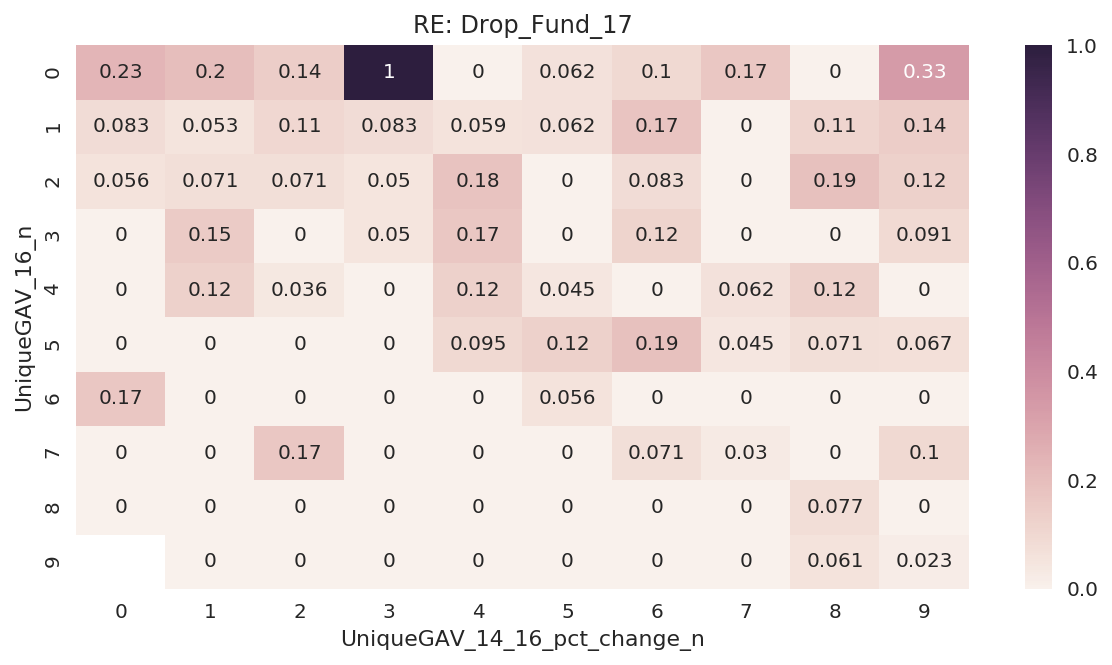

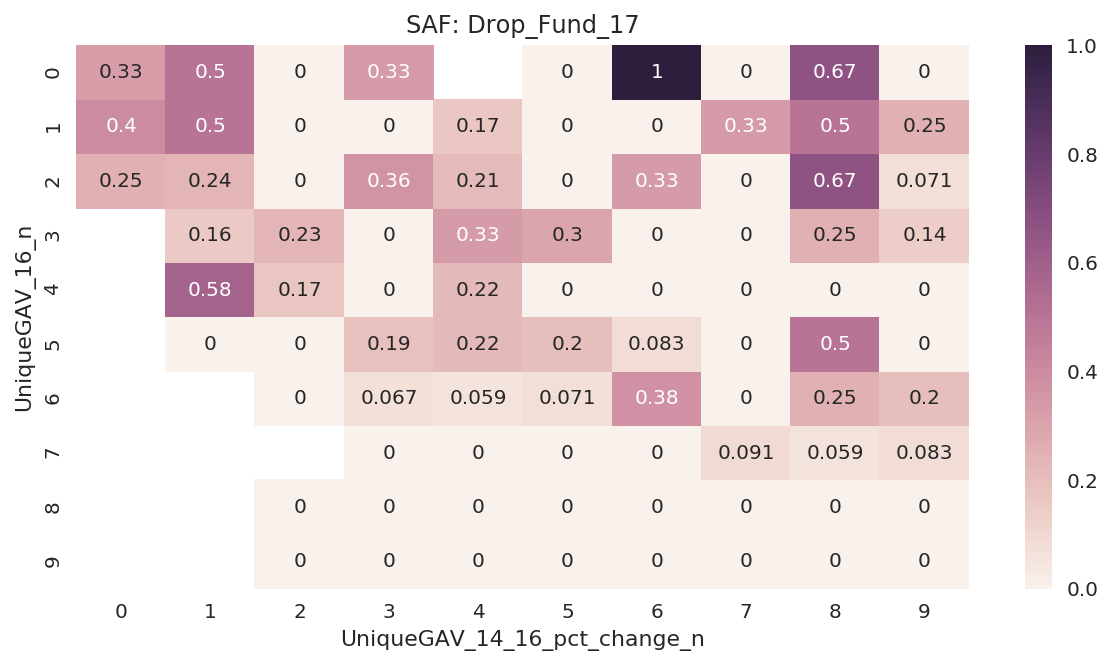

In [168]:
funds = ['HF', 'VC', 'PE', 'RE', 'SAF']
for fund in funds:
    heatup(geoff,fund=fund)
    plt.figure()

In [ ]:
# insert second and third functions with respective calls here

### Ok, so now there are 116 heat maps to look through.  Focus most time for now on Drop_Fund_17 and  Same_Fund_17_New_AuditGrp. Entertaining enough?   What are some of the key so-whats?   Which 2-5 heatmaps tell the best story and why?  How can we think about our models based on what has been learned?